## House price predicter

### Problem statement:
The goal is to understand the relationship between house features and how these
variables affect the house price.
Using more than one model, predict the price of the house using the given dataset. Please compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.

In [1]:
#importing libery
import pandas as pd
import numpy as np

In [2]:
#loading dataset
df = pd.read_excel("Assignment1_dataset.xlsx")

In [3]:
#overviw of dataset
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## multivariate analysis

In [4]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Transaction date'}>,
        <AxesSubplot:title={'center':'House Age'}>,
        <AxesSubplot:title={'center':'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot:title={'center':'Number of convenience stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Number of bedrooms'}>,
        <AxesSubplot:title={'center':'House size (sqft)'}>,
        <AxesSubplot:title={'center':'House price of unit area'}>]],
      dtype=object)

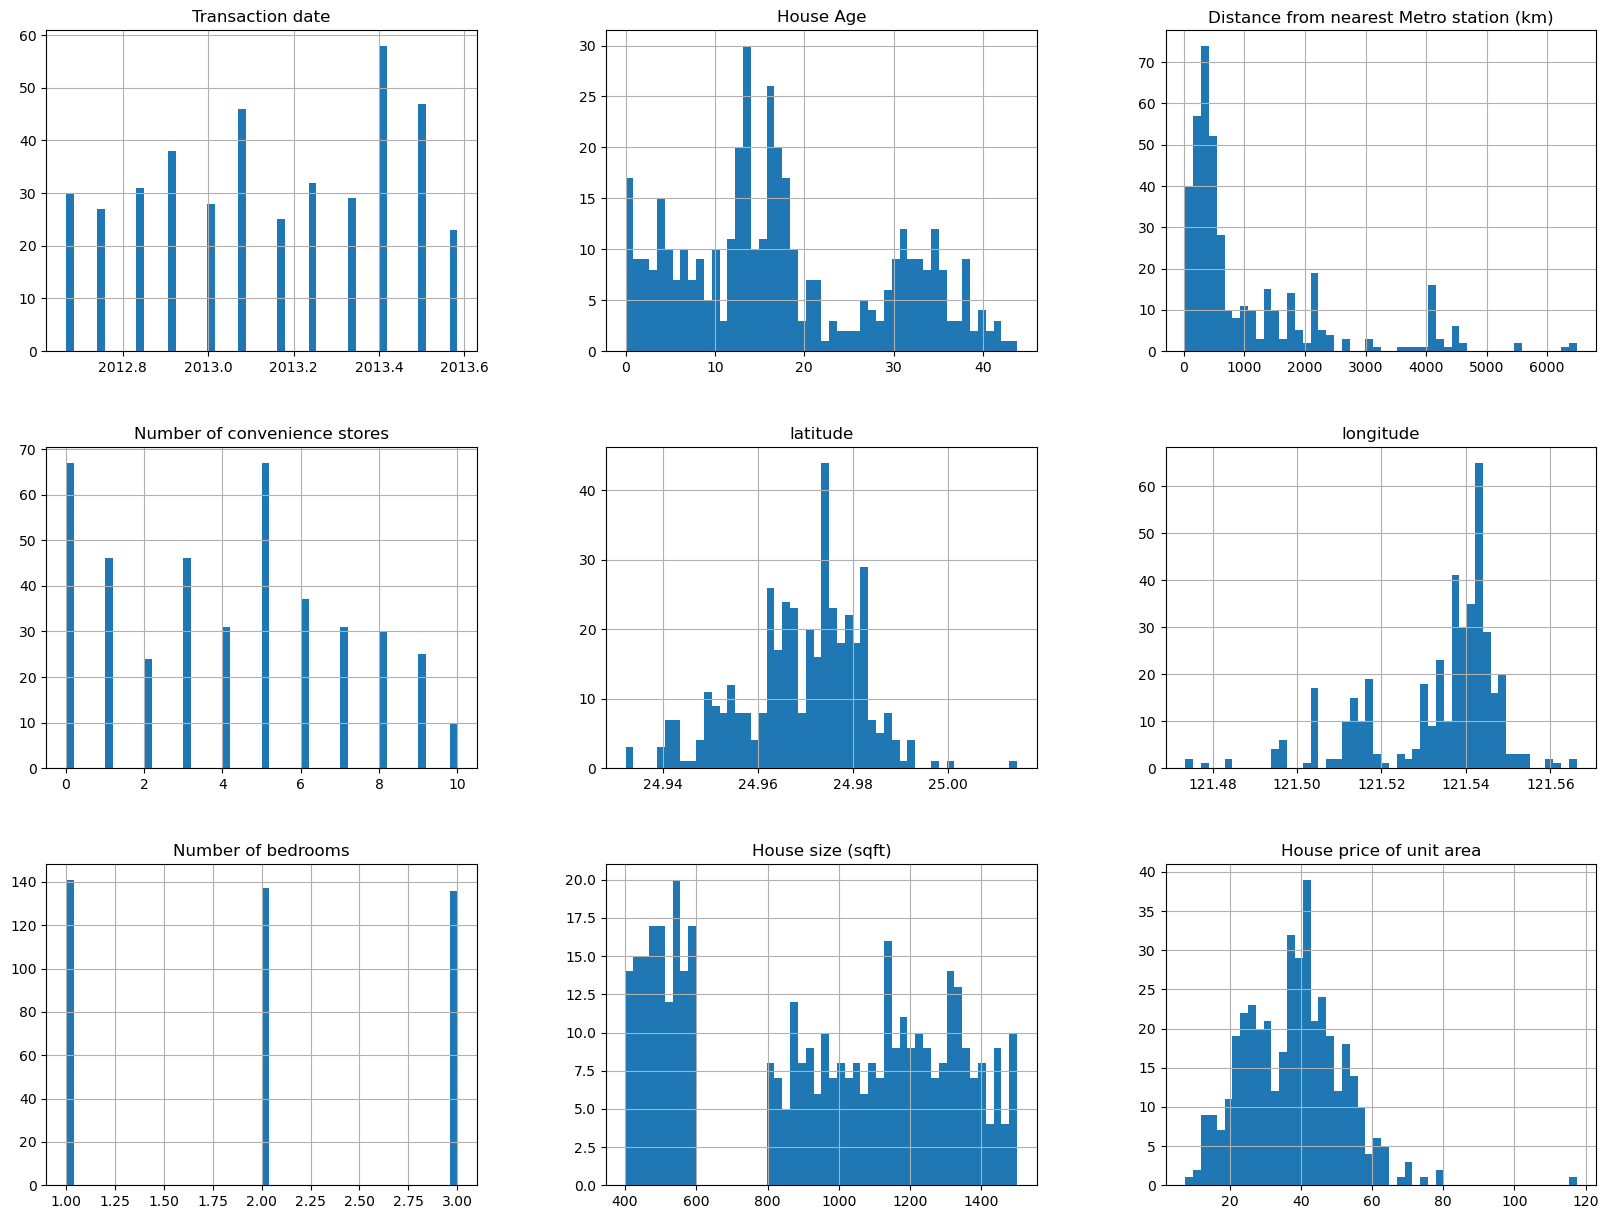

In [6]:
#distribution of all features
df.hist(bins=50, figsize=(20, 15))

In [7]:
#sum of null values feature wise
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

**three is no null values**

## univariate Analysis

In [8]:
df['Number of convenience stores'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

In [9]:
df['House Age'].unique()

array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 35.8,  4.9,  6.5, 30.7, 11.6,
       15.5, 16. , 13.7, 28.2, 27.6,  8.4, 24. ,  3.6,  4.3, 30.2, 33. ,
       13.1, 14. , 26.9, 13.5, 17. , 14.1, 20.9, 16.3, 35.3, 43.8,  9.7,
       15.2, 22.8, 34. , 18.2, 17.4, 38.3, 15.6, 12

In [10]:
df['Number of bedrooms'].unique()

array([1, 2, 3], dtype=int64)

In [11]:
df['House price of unit area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: House price of unit area, dtype: float64

**outlier**

In [12]:
import seaborn as sns

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House price of unit area'>

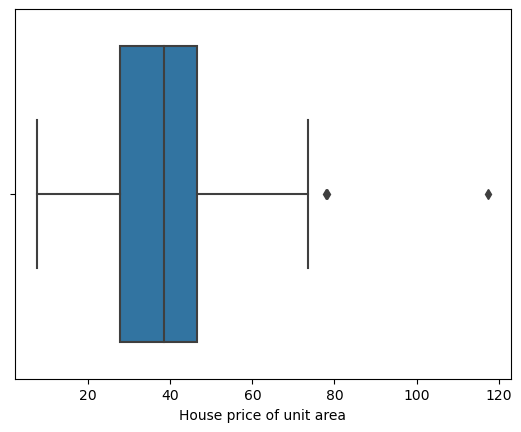

In [13]:
#ploting box plot for checking outliers
sns.boxplot(df['House price of unit area'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House Age'>

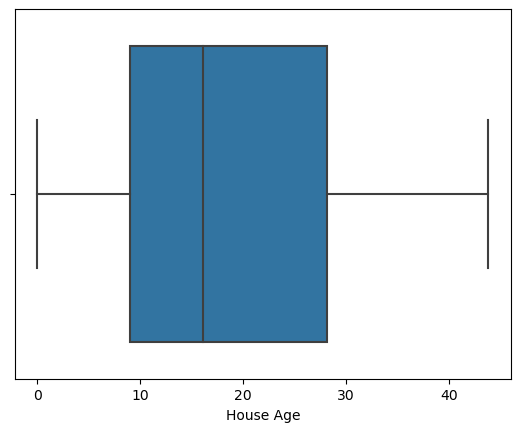

In [14]:
sns.boxplot(df['House Age'])

**there is no outlier**

In [15]:
len(df['latitude'].unique())

234

### correlation

In [16]:
#checking correlation between features 
corr_matrix = df.corr()
corr_matrix["House price of unit area"].sort_values(ascending=False)

House price of unit area                    1.000000
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087529
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House price of unit area, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

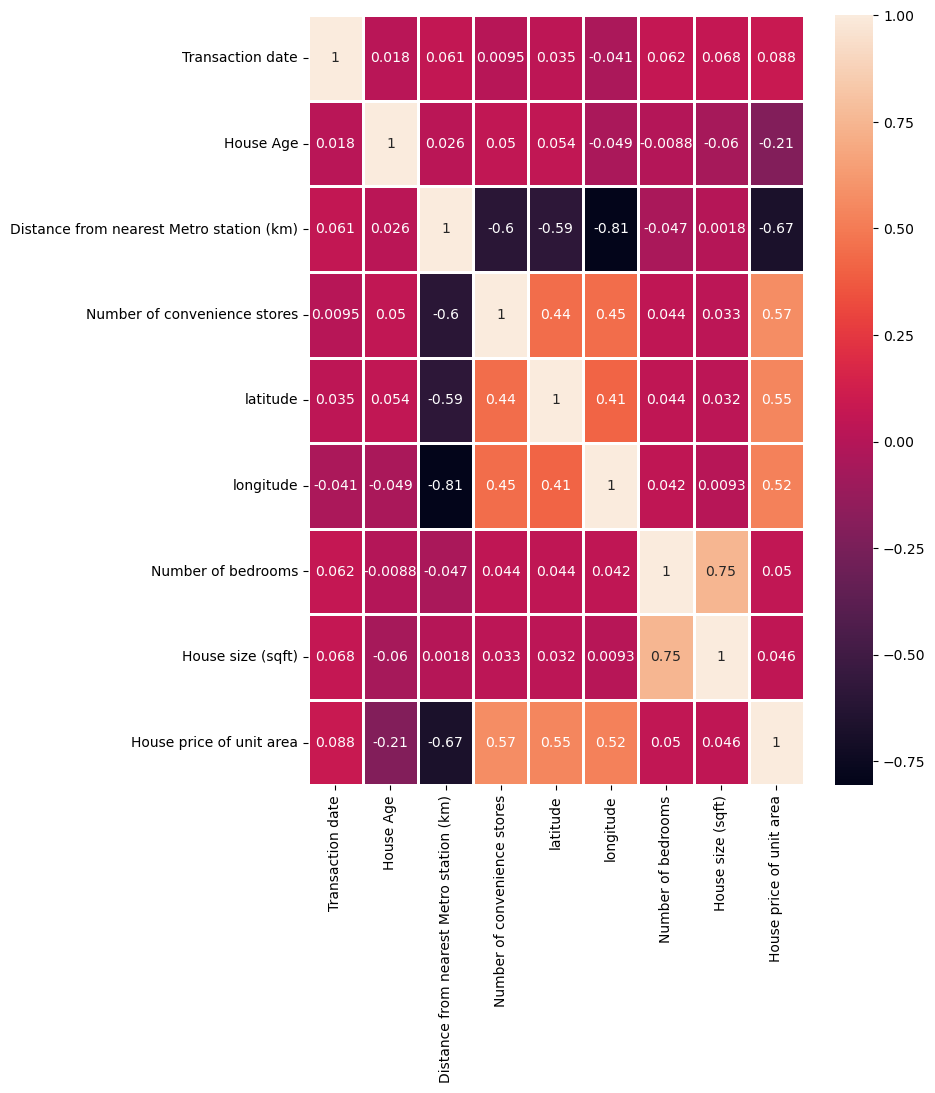

In [17]:
#correlation visual using heatmap
plt.figure(figsize=(8,10))
sns.heatmap(df.corr(),annot=True, linewidths=2)
plt.show

**Distance from nearest Metro station (km), Number of convenience stores and latitude are highly correleted**

## Assumption of linear regrassion
***
**1. the target and independent variable should a linear relation between them**

**2. If it is not linear we convert it into linear by using variable transformation using operation such as x-squre, root-x, or log x**

**3. there should not multicolinearity**

**4. muticolinearity = correlation between independent variable is called multicolinearity**

**5. we will remove this using VIF**

**multicolinearity**

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
data= df.iloc[:,:-1]
data

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491
...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597


In [20]:
pd.Series([variance_inflation_factor(data.values,i) for i in range (data.shape[1])], index=data.columns)

Transaction date                            4.264162e+07
House Age                                   3.500035e+00
Distance from nearest Metro station (km)    4.287569e+00
Number of convenience stores                4.758596e+00
latitude                                    6.184837e+06
longitude                                   4.212056e+07
Number of bedrooms                          1.607817e+01
House size (sqft)                           1.902631e+01
dtype: float64

**there is no multi colinearity because VIF is less then 5**

## data preprocessing

**train test split**

In [21]:
x = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [22]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

**standard scaler**

In [23]:
from sklearn.preprocessing import StandardScaler
'''sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)'''

'sc = StandardScaler()\nx_train = sc.fit_transform(x_train)\nx_test = sc.transform(x_test)'

In [24]:
#creating pipeline
import sklearn.pipeline
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline([
    ('sc', StandardScaler()),
])

In [25]:
x_train=my_pipeline.fit_transform(x_train)
x_test=my_pipeline.fit_transform(x_test)

## linear Regressin model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model1=LinearRegression()
model1.fit(x_train, y_train)
predictons1=model1.predict(x_train)

In [28]:
model1.score(x_train, y_train)

0.5802436812443844

## Random forest model

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)
prediction2 = model2.predict(x_train)

In [31]:
model2.score(x_train, y_train)

0.9570460842063554

In [32]:
from sklearn.metrics import r2_score
r2_score(y_train,prediction2)

0.9570460842063554

## Decision tree model

In [33]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [34]:
model3=DTR(random_state = 0)
model3.fit(x_train, y_train)
prediction3 = model3.predict(x_train)

In [35]:
model3.score(x_train, y_train)

1.0

**here our model gives 100% accurecy becuse of this model has an issue that is overfitting**

**so, to aviod overfitting we use cross validation**

## xgboost model

In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
import xgboost as xg

In [38]:
model4 = xg.XGBRegressor(subsample=0.7, colsample_bytree=0.8, n_estimators = 100, max_depth=6)

In [39]:
model4.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
prediction4 = model4.predict(x_train)
model4.score(x_train, y_train)

0.9999823432401467

## cross validation

#### mean accurcy score and standard deviation with cross validatio

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
#creating function that will help to fast impliment of cross validation 
def model(model_name):
    scores = cross_val_score(model_name, X=x_train, y= y_train, cv=10)
    mean_score= scores.mean()
    std_score= scores.std()
    return mean_score, std_score

In [43]:
#mean accurcy score (mas) and standard davition (std) for model1 (linear regression)
mas1, std1 =model(model1)
print(mas1, std1)

0.5648354851072321 0.14016191350293306


In [44]:
#mean accurcy score (mas) and standard davition (std) for model2 (random forest)
mas2, std2 =model(model2)
print(mas2, std2)

0.6927691284266444 0.13628771908172396


In [45]:
#mean accurcy score (mas) and standard davition (std) for model3 (decision tree)
mas3, std3 =model(model3)
print(mas3, std3)

0.4175715971899656 0.27525316415404383


In [46]:
#mean accurcy score (mas) and standard davition (std) for model4 (xgboost)
mas4, std4 =model(model4)
print(mas4, std4)

0.6436643157600661 0.16041020701031403


## compersion of models

In [47]:
models_comp=pd.DataFrame({'models':['Linear_Regression','Random_Forest','Decision_Tree','xgboost'],'mean_accurcy_score':[mas1,mas2,mas3,mas4],'standard_daviation':[std2,std2,std3, std4]})
models_comp.sort_values(by='mean_accurcy_score', ascending=False, ignore_index=True)

,models,mean_accurcy_score,standard_daviation
0,Random_Forest,0.692769,0.136288
1,xgboost,0.643664,0.160410
2,Linear_Regression,0.564835,0.136288
3,Decision_Tree,0.417572,0.275253


**Random Forest is best model among these models**

**Rondom forest model is represented by model2 in this project**

## practice of model

In [48]:
some_label=y
prepare_data=my_pipeline.fit_transform(x)

In [49]:
model2.predict(prepare_data[:10])

array([42.515, 42.622, 48.258, 49.93 , 51.735, 26.621, 38.302, 47.265,
       19.048, 23.262])

In [50]:
list(some_label[:10])

[37.9, 42.2, 47.3, 54.8, 43.1, 32.1, 40.3, 46.7, 18.8, 22.1]

## pickling the file for deployment

In [51]:
import pickle

In [52]:
pickle.dump(model2,open('rfrmodel.pkl','wb'))

In [53]:
pickled_model=pickle.load(open('rfrmodel.pkl','rb'))

In [54]:
pickled_model.predict((x_test[1].reshape(1,-1)))

array([16.917])

In [55]:
pickled_model.predict((x_test[0].reshape(1,-1)))

array([70.33])